In [9]:
import numpy as np


from dgllife.utils import smiles_to_bigraph
from rdkit import Chem
from rdkit.Chem import Draw


from src.utils.basic.io import load_checkpoint
from src.utils.mol.attfp_graph import featurize_atoms, featurize_edges

In [10]:
def single_molecule_prediction(smiles, task_name):
    input_data = smiles_to_bigraph(smiles,
                                   node_featurizer=featurize_atoms,
                                   edge_featurizer=featurize_edges)
    alphas = []
    preds = []
    # Load each model for prediction
    if task_name == "Pgp-inhibitor":
        for i in range(10):
            model = load_checkpoint(f"./trained_model/{task_name}/model_{i}.config")
            batch_alphas, batch_preds = model.predict_on_batch(input_data)
            batch_preds = batch_preds[:, 1].unsqueeze(-1)
            preds.extend(batch_preds.data.cpu().numpy().tolist())
            alphas.extend(batch_alphas.data.cpu().numpy().tolist())

    else:
        for i in range(5):
            model = load_checkpoint(f"./trained_model/{task_name}/model_{i}.config")
            batch_alphas, batch_preds = model.predict_on_batch(input_data)
            batch_preds = batch_preds[:, 1].unsqueeze(-1)
            preds.extend(batch_preds.data.cpu().numpy().tolist())
            alphas.extend(batch_alphas.data.cpu().numpy().tolist())
    
    # show results
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol)
    img.show()
    prob_pred = np.mean(preds)
    pred_label = 1 if prob_pred >= 0.5 else 0
    print(f"The predicted label is {pred_label}")
    print(f"The predicted probability is {prob_pred}")
    print(f"The predicted [alpha_0, alpha_1] are {np.mean(alphas, axis=0)}")

05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.project_node.0.weight".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.project_node.0.bias".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.project_edge1.0.weight".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.project_edge1.0.bias".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.project_edge2.1.weight".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.project_edge2.1.bias".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.attentive_gru.edge_transform.1.weight".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.attentive_gru.edge_transform.1.bias".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.attentive_gru.gru.weight_ih".
05-18 11:23:41	Loading pretrained parameter "encoder.attfp.init_context.attentive_gru.gru.weight_hh".


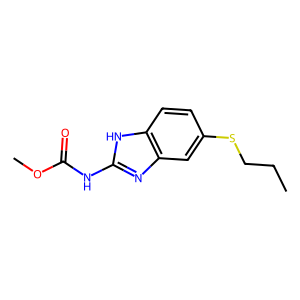

The predicted label is 0
The predicted probability is 0.06882326044142247
The predicted [alpha_0, alpha_1] are [213.11959763  16.16397719]


In [11]:
smiles = 'CCCSC1=CC2=C(NC(NC(=O)OC)=N2)C=C1' # input your molecule
task_name = 'Pgp-inhibitor' # choose your prediction task
"""
choose your prediction task
optional: [hERG, BBB, CYP2C9, CYP3A4, Pgp-inhibitor, Pgp-substrate]
hERG:   Whether to inhibit hERG
BBB:    Whether it can cross the blood-brain barrier
CYP2C9: Whether to inhibit CYP2C9
CYP3A4: Whether to inhibit CYP3A4
Pgp-inhibitor:  Whether to inhibit P-gp
Pgp-substrate:  Whether it is a P-gp substrate // TO BE DONE
0 = no
1 = yes
"""
single_molecule_prediction(smiles, task_name)

In [ ]:
# TODO
# 1.Pgp-substrate model training
# 2.Multi molecules prediction
# 